Generate test cases for bessel interpolation and masking.

Import all required packages

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.special
import ghalton
import numpy as np
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [4]:
from utils import clean,to_radian,hann
from rotation_2d import rot_cost_func
from visualize import plot_cost_func
from cost_functions import cf_ssd

In [5]:
# load data
data_dict = pickle.load(open('data_dict.p','rb'))

## Bessel Interpolation

Test bessel interpolation with a plain image of all ones.

In [14]:
from mask import circle_mask
from Bessel_Interp import bessel_rotate,bessel_rotate_halton

Rotate the plain image by 0 degrees, 90 degrees, and 180 degrees. Results should all be the same image with all ones (with some numerical error)

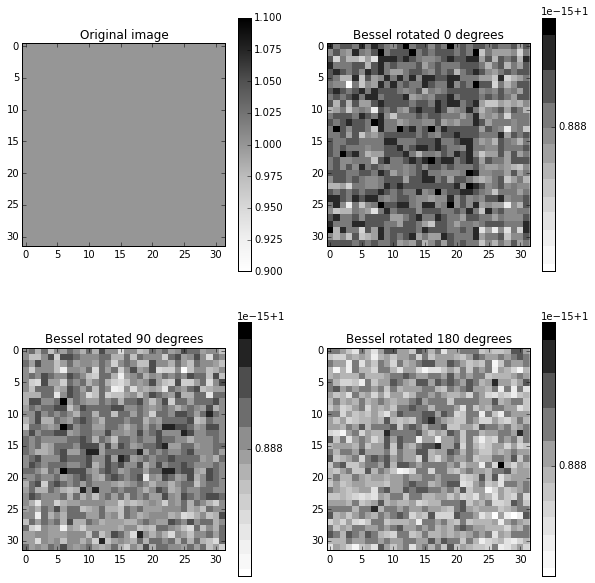

In [23]:
# Test Bessel Interpolation
im = np.ones([32,32])

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im, interpolation='None',cmap='Greys')
plt.title('Original image')
plt.colorbar()

theta = 0
interped_0 = bessel_rotate(im,theta,mask=False)
plt.subplot(2,2,2)
plt.imshow(interped_0, interpolation='None',cmap='Greys')
plt.title('Bessel rotated %s degrees' % (theta))
plt.colorbar()
theta = 90
interped_90 = bessel_rotate(im,theta,mask=False)
plt.subplot(2,2,3)
plt.imshow(interped_90, interpolation='None',cmap='Greys')
plt.title('Bessel rotated %s degrees' % (theta))
plt.colorbar()
theta = 180
interped_180 = bessel_rotate(im,theta,mask=False)
plt.subplot(2,2,4)
plt.imshow(interped_180, interpolation='None',cmap='Greys')
plt.title('Bessel rotated %s degrees' % (theta))
plt.colorbar()
plt.show()

Check if they are all close of 1.

In [25]:
print '0 degrees', np.allclose(interped_0,im)
print '90 degrees', np.allclose(interped_90,im)
print '90 degrees', np.allclose(interped_180,im)

0 degrees True
90 degrees True
90 degrees True


### Masking
Try putting a smooth mask on an image.

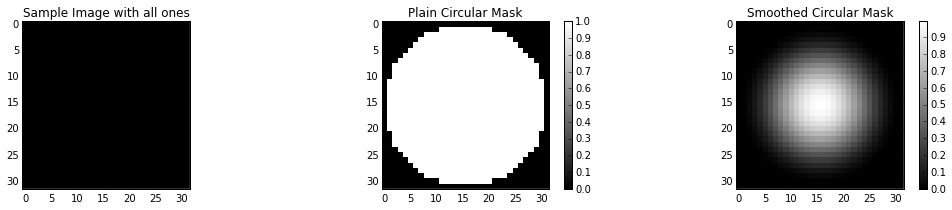

In [12]:
im = np.ones([32,32])
plt.figure(figsize=[18,3])
# a blank image
plt.subplot(1,3,1)
plt.imshow(im,interpolation='None',cmap='gray')
plt.title('Sample Image with all ones')
# putting a circular mask on the image
plt.subplot(1,3,2)
plt.imshow(circle_mask(im,False),interpolation='None',cmap='gray')
plt.title('Plain Circular Mask')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(circle_mask(im),interpolation='None',cmap='gray')
plt.title('Smoothed Circular Mask')
plt.colorbar()
plt.show()

Generate Halton Points inside the smoothed mask.

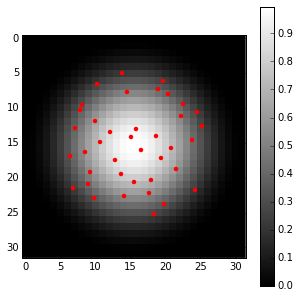

In [26]:
N = 100
r = 32
im = np.ones([r,r])
sequencer = ghalton.GeneralizedHalton(ghalton.EA_PERMS[:3])
sequencer.reset()
points = sequencer.get(N)
pts = np.array(points)
s = (r-1)/2.
x1 = (r-1) * pts[:,0]
y1 = (r-1) * pts[:,1]

mask = np.sqrt((x1-s)**2+(y1-s)**2) < s*0.7
xx1 = x1[mask]
yy1 = y1[mask]
plt.figure(figsize=[5,5])
plt.scatter(xx1,yy1,c='r',lw=0)
plt.imshow(circle_mask(im,True,1),interpolation='None',cmap='gray')
plt.colorbar()
plt.show()

In [29]:
# Halton samples without using mask, results should be all one's
print bessel_rotate_halton(im,0,x1,y1)
print bessel_rotate_halton(im,90,x1,y1)
print bessel_rotate_halton(im,180,x1,y1)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.